In [1]:
import sys
!{sys.executable} -m pip install --upgrade pip


In [2]:
import sys
!{sys.executable} -m pip install numpy opencv-python matplotlib

In [3]:
import sys
!{sys.executable} -m pip install opencv-python matplotlib albumentations

In [4]:
from dataset_utils import random_perspective, augment_hsv, cutout, load_mosaic, mixup, letterbox

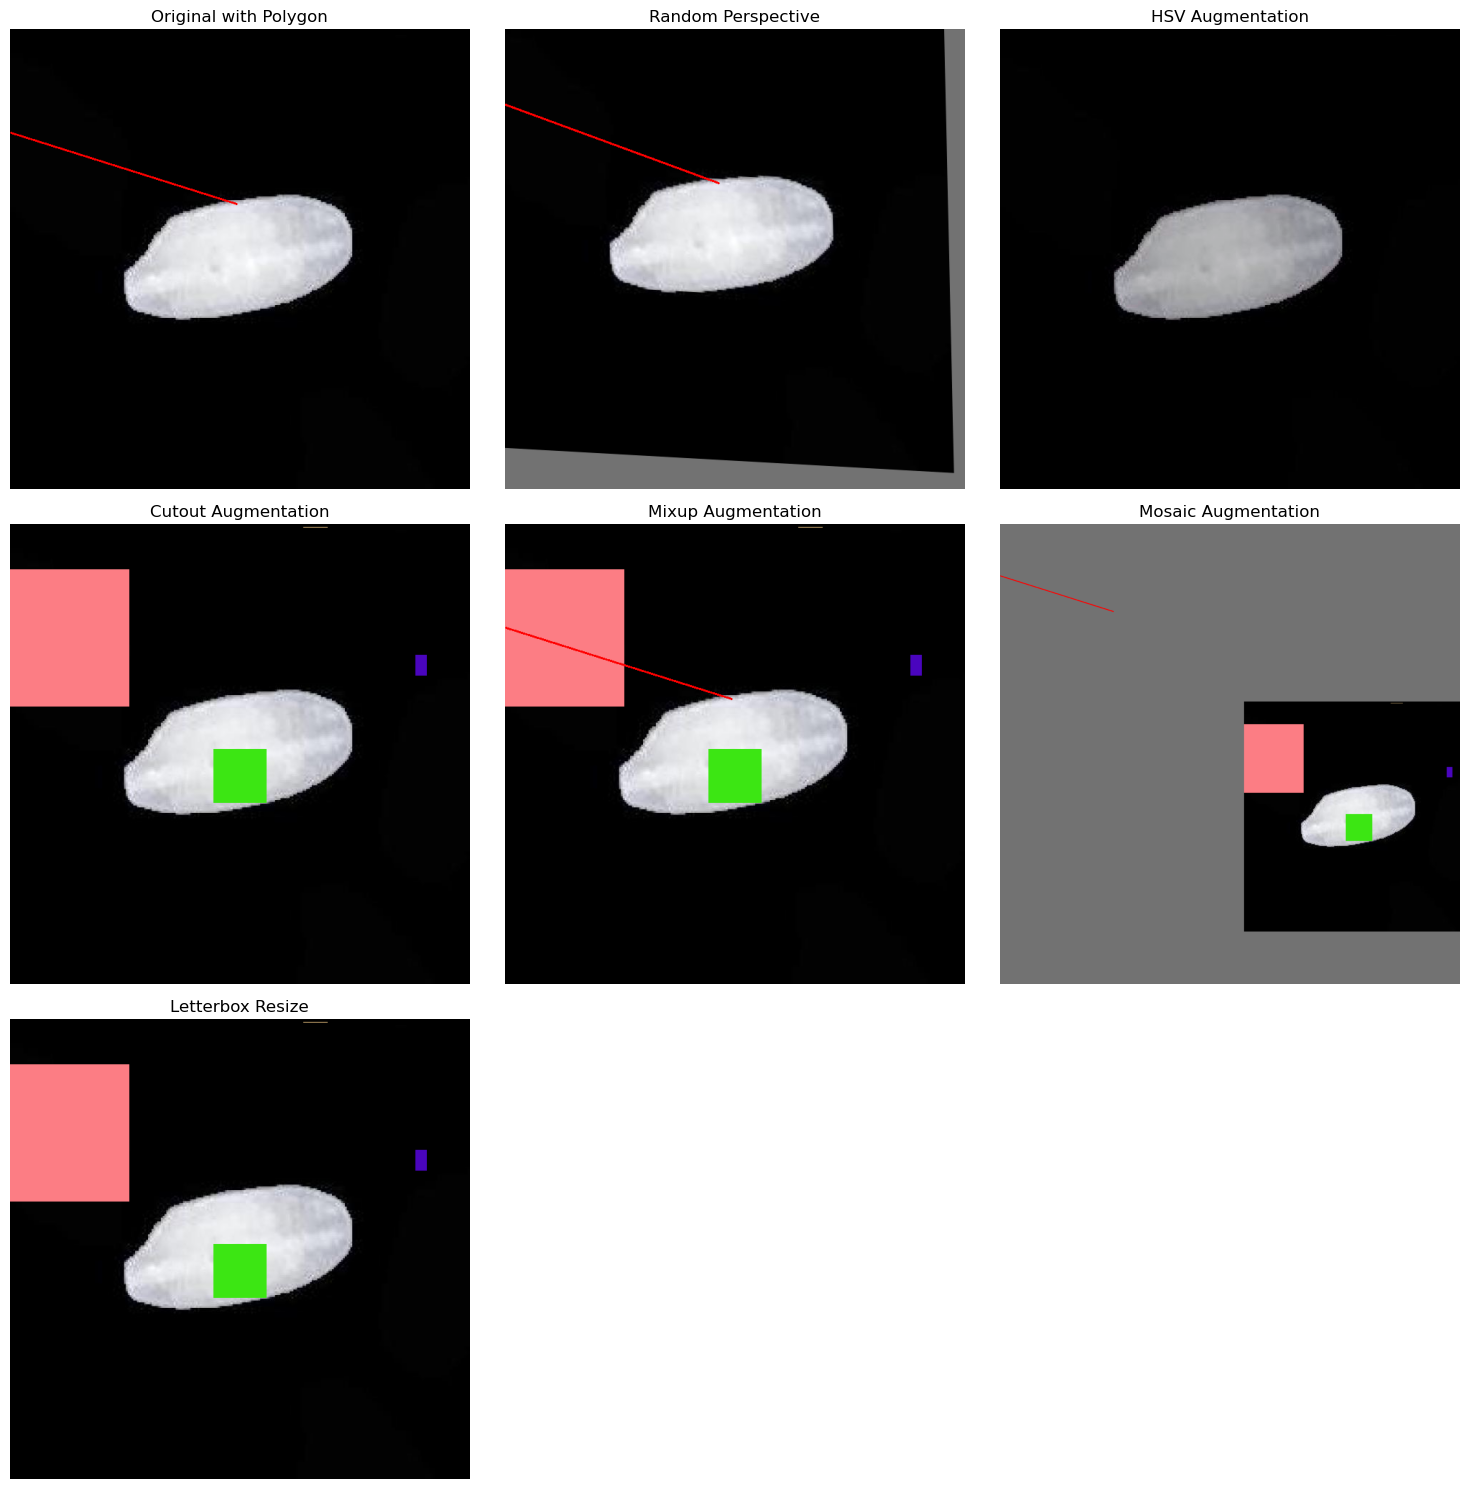

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from dataset_utils import random_perspective, augment_hsv, cutout, load_mosaic, mixup, letterbox

# Load the image
image_path = r"C:\Users\navis\Downloads\matrice_rice.v1i.yolov8\train\images\Arborio-101-_jpg.rf.2c51a794cb26b692c1202e6fd14a433e.jpg"
label_path = r"C:\Users\navis\Downloads\matrice_rice.v1i.yolov8\train\labels\Arborio-101-_jpg.rf.2c51a794cb26b692c1202e6fd14a433e.txt"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for visualization

# Load the label (polygon-like format)
with open(label_path, 'r') as f:
    data = f.read().strip().split()
polygon_points = np.array(data[1:], dtype=np.float32).reshape(-1, 2)  # Reshape to (N, 2)

# Scale the label points to the image dimensions
polygon_points[:, 0] *= image.shape[1]  # Scale x-coordinates
polygon_points[:, 1] *= image.shape[0]  # Scale y-coordinates

# Function to draw polygons on the image
def draw_polygon(img, points, color=(255, 0, 0)):
    img_copy = img.copy()
    points = points.astype(int)
    for i in range(len(points)):
        cv2.line(img_copy, tuple(points[i]), tuple(points[(i + 1) % len(points)]), color, 2)
    return img_copy

# Augmentation Visualizations
# 1. Original Image with Polygon
original_with_polygon = draw_polygon(image, polygon_points)

# 2. Random Perspective
perspective_image, perspective_labels = random_perspective(image, polygon_points)
perspective_with_polygon = draw_polygon(perspective_image, perspective_labels)

# 3. HSV Augmentation
hsv_image = augment_hsv(image)

# 4. Cutout Augmentation
cutout_image, _ = cutout(image, polygon_points)

# 5. Mixup (requires two images; using the same image twice for simplicity)
mixup_image, mixup_labels = mixup(image, polygon_points, image, polygon_points)
mixup_with_polygon = draw_polygon(mixup_image, mixup_labels)

# 6. Mosaic Augmentation (requires 4 images; using the same image repeatedly for simplicity)
mosaic_images = [image] * 4  # Replace with 4 distinct images from your dataset for real use
mosaic_labels = [polygon_points] * 4  # Replace with corresponding labels
mosaic_image, mosaic_combined_labels = load_mosaic(mosaic_images, mosaic_labels, img_size=640)
mosaic_with_polygon = draw_polygon(mosaic_image, mosaic_combined_labels)

# 7. Letterbox Resize
letterbox_image = letterbox(image, new_shape=(640, 640))

# Display Results
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

# Original Image
axes[0, 0].imshow(original_with_polygon)
axes[0, 0].set_title("Original with Polygon")
axes[0, 0].axis("off")

# Random Perspective
axes[0, 1].imshow(perspective_with_polygon)
axes[0, 1].set_title("Random Perspective")
axes[0, 1].axis("off")

# HSV Augmentation
axes[0, 2].imshow(hsv_image)
axes[0, 2].set_title("HSV Augmentation")
axes[0, 2].axis("off")

# Cutout Augmentation
axes[1, 0].imshow(cutout_image)
axes[1, 0].set_title("Cutout Augmentation")
axes[1, 0].axis("off")

# Mixup Augmentation
axes[1, 1].imshow(mixup_with_polygon)
axes[1, 1].set_title("Mixup Augmentation")
axes[1, 1].axis("off")

# Mosaic Augmentation
axes[1, 2].imshow(mosaic_with_polygon)
axes[1, 2].set_title("Mosaic Augmentation")
axes[1, 2].axis("off")

# Letterbox Resize
axes[2, 0].imshow(letterbox_image)
axes[2, 0].set_title("Letterbox Resize")
axes[2, 0].axis("off")

# Turn off the last unused subplots
axes[2, 1].axis("off")
axes[2, 2].axis("off")

plt.tight_layout()
plt.show()


In [6]:
# Step 1: Clone the YOLOv10 repository
!git clone https://github.com/ultralytics/ultralytics




Cloning into 'ultralytics'...
Updating files:  28% (193/675)
Updating files:  29% (196/675)
Updating files:  30% (203/675)
Updating files:  31% (210/675)
Updating files:  32% (216/675)
Updating files:  33% (223/675)
Updating files:  34% (230/675)
Updating files:  35% (237/675)
Updating files:  36% (243/675)
Updating files:  37% (250/675)
Updating files:  38% (257/675)
Updating files:  38% (263/675)
Updating files:  39% (264/675)
Updating files:  40% (270/675)
Updating files:  41% (277/675)
Updating files:  42% (284/675)
Updating files:  43% (291/675)
Updating files:  44% (297/675)
Updating files:  45% (304/675)
Updating files:  46% (311/675)
Updating files:  47% (318/675)
Updating files:  48% (324/675)
Updating files:  49% (331/675)
Updating files:  50% (338/675)
Updating files:  51% (345/675)
Updating files:  52% (351/675)
Updating files:  52% (352/675)
Updating files:  53% (358/675)
Updating files:  54% (365/675)
Updating files:  55% (372/675)
Updating files:  56% (378/675)
Updating 

In [7]:
!pip install ultralytics

In [9]:
import ultralytics
  # Prints the version of the installed library


In [12]:
!pip install transformers

In [13]:
import os
import numpy as np

def convert_polygon_to_bbox(label_line):
    """
    Transform a label line with polygon data into YOLO bounding box format.
    """
    # Split the line and extract numerical values
    values = list(map(float, label_line.strip().split()))
    class_id = int(values[0])  # The first value represents the class ID
    points = np.array(values[1:]).reshape(-1, 2)  # Convert the rest into pairs of (x, y)

    # Calculate the minimum and maximum coordinates
    x_min = points[:, 0].min()
    x_max = points[:, 0].max()
    y_min = points[:, 1].min()
    y_max = points[:, 1].max()

    # Derive YOLO bounding box format
    x_center = (x_min + x_max) / 2
    y_center = (y_min + y_max) / 2
    width = x_max - x_min
    height = y_max - y_min

    return [class_id, x_center, y_center, width, height]

def process_labels_in_place(input_dir):
    """
    Convert all label files in a directory from polygon format to YOLO bounding box format
    and update the files with the new format.
    
    Args:
    - input_dir (str): Path to the directory containing the label files.
    """
    for file_name in os.listdir(input_dir):
        if file_name.endswith(".txt"):  # Ensure only .txt files are processed
            file_path = os.path.join(input_dir, file_name)

            # Read the original label file
            with open(file_path, "r") as infile:
                label_lines = infile.readlines()

            # Process and overwrite the label file
            with open(file_path, "w") as outfile:
                for line in label_lines:
                    bbox = convert_polygon_to_bbox(line)
                    # Write in YOLO format: class_id x_center y_center width height
                    outfile.write(f"{bbox[0]} {bbox[1]:.6f} {bbox[2]:.6f} {bbox[3]:.6f} {bbox[4]:.6f}\n")

    print(f"Converted and updated label files in directory: {input_dir}")

# Specify the input directory containing label files
input_directory = r"C:\Users\navis\Downloads\matrice_rice.v1i.yolov8\train\labels"

# Run the label processing function
process_labels_in_place(input_directory)


Converted and updated label files in directory: C:\Users\navis\Downloads\matrice_rice.v1i.yolov8\train\labels


In [14]:
from dataset_utils import random_perspective, augment_hsv, cutout, mixup, load_mosaic
import os
import cv2
import numpy as np
from tqdm import tqdm

def yolo_to_corners(labels):
    """
    Convert YOLO format bounding boxes to corner coordinates.
    """
    new_labels = []
    for label in labels:
        class_id, x_center, y_center, width, height = label
        x_min = x_center - width / 2
        y_min = y_center - height / 2
        x_max = x_center + width / 2
        y_max = y_center + height / 2
        new_labels.append([class_id, x_min, y_min, x_max, y_max])
    return np.array(new_labels)
    

# Function to apply all augmentations to a single image and its labels
def apply_augmentations(image, labels):
    """
    Apply data augmentations from dataset_utils.py to the image and labels.
    """
    
    # Random perspective
    #image, labels = random_perspective(image, labels)
    
    # HSV Augmentation
    image = augment_hsv(image)
    
    # Cutout Augmentation
    image, labels = cutout(image, labels)

    
    
    # Return the augmented image and labels
    return image, labels

# Path to the dataset
images_path = r"C:\Users\navis\Downloads\matrice_rice.v1i.yolov8\train\images"  # Update with your dataset's train image directory
labels_path = r"C:\Users\navis\Downloads\matrice_rice.v1i.yolov8\train\labels"  # Update with your dataset's train label directory

# Output directories for augmented data
aug_images_path = r"C:\Users\navis\Downloads\Rice_augmented\Images\train_augmented"
aug_labels_path = r"C:\Users\navis\Downloads\Rice_augmented\Labels\train_augmented"

# Ensure the output directories exist
os.makedirs(aug_images_path, exist_ok=True)
os.makedirs(aug_labels_path, exist_ok=True)

# Apply augmentations to all training images
print("Applying augmentations to training dataset...")
for img_file in tqdm(os.listdir(images_path)):
    if img_file.endswith('.jpg') or img_file.endswith('.png'):
        # Read the image
        img_path = os.path.join(images_path, img_file)
        image = cv2.imread(img_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB
        
        # Read the corresponding label
        label_file = img_file.replace('.jpg', '.txt').replace('.png', '.txt')
        label_path = os.path.join(labels_path, label_file)
        if not os.path.exists(label_path):
            continue
        
        with open(label_path, 'r') as f:
            labels = f.readlines()
        
        # Convert labels to numpy array for augmentation
        labels = np.array([list(map(float, line.strip().split())) for line in labels])
        
        # Apply augmentations
        augmented_image, augmented_labels = apply_augmentations(image, labels)
        
        # Save the augmented image
        aug_img_path = os.path.join(aug_images_path, img_file)
        augmented_image = cv2.cvtColor(augmented_image, cv2.COLOR_RGB2BGR)  # Convert back to BGR
        cv2.imwrite(aug_img_path, augmented_image)
        
        # Save the augmented labels
        aug_label_path = os.path.join(aug_labels_path, label_file)
        with open(aug_label_path, 'w') as f:
            for label in augmented_labels:
                f.write(' '.join(map(str, label)) + '\n')

print("Data augmentation completed. Augmented dataset saved.")

# Create the augmented dataset's YAML file
aug_data_yaml = """
train: C:/Users/navis/Downloads/Rice_augmented/Images/train_augmented
val: C:/Users/navis/Downloads/matrice_rice.v1i.yolov8/valid/images
test: C:/Users/navis/Downloads/matrice_rice.v1i.yolov8/test/images
nc: 5  # Number of classes in your dataset
names: [Arborio, Basmati, Ipsala, Jasmine, Karacadag]  # Class names
train_labels: C:/Users/navis/Downloads/Rice_augmented/Labels/train_augmented

"""

# Save the new YAML file for augmented data
with open(r"C:\Users\navis\Downloads\Rice_augmented\data_augmented.yaml", 'w') as f:
    f.write(aug_data_yaml)

print("Updated data.yaml file for augmented dataset created.")

Applying augmentations to training dataset...


100%|████████████████████████████████████████████████████████████████████████████████| 350/350 [00:40<00:00,  8.55it/s]

Data augmentation completed. Augmented dataset saved.
Updated data.yaml file for augmented dataset created.


In [15]:
pip install git+https://github.com/ultralytics/ultralytics

  Cloning https://github.com/ultralytics/ultralytics to c:\users\navis\appdata\local\temp\pip-req-build-5ph50o03
  Resolved https://github.com/ultralytics/ultralytics to commit 426879d80d49d0180b525c4fc2484772f9f6f8cc
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Note: you may need to restart the kernel to use updated packages.


  Running command git clone --filter=blob:none --quiet https://github.com/ultralytics/ultralytics 'C:\Users\navis\AppData\Local\Temp\pip-req-build-5ph50o03'


In [ ]:
!pip install ultralytics matplotlib pandas

In [16]:
from ultralytics import YOLO

In [ ]:
# Load a model
model1 = YOLO("yolo11n.pt")

# Train the model
train_results = model1.train(
    data=r"C:\Users\navis\Downloads\Rice_augmented\data_augmented.yaml",  # path to dataset YAML
    epochs=10,  # number of training epochs
    imgsz=640,  # training image size
    device="cpu",  # device to run on, i.e. device=0 or device=0,1,2,3 or device=cpu
)

# Save the trained model
trained_model_path = r"C:\Users\navis\Downloads\yolov10m_augmented.pt"
model.save(trained_model_path)
print(f"Training completed. Model saved at: {trained_model_path}")

In [ ]:
# Load a model
model2 = YOLO("yolo11n.pt")

# Train the model
train_results = model2.train(
    data=r"C:\Users\navis\Downloads\matrice_rice.v1i.yolov8\data.yaml",  # path to dataset YAML
    epochs=10,  # number of training epochs
    imgsz=640,  # training image size
    device="cpu",  # device to run on, i.e. device=0 or device=0,1,2,3 or device=cpu
)
# Step 6: Save the Trained Model
output_model_path = r"C:\Users\navis\Downloads\yolov10m_no_augmented.pt"
model.save(output_model_path)
print(f"Training completed. Model saved at: {output_model_path}")

In [ ]:
from ultralytics import YOLOv10
import matplotlib.pyplot as plt
import pandas as pd

# Paths to your trained models
model1_path = r"C:\Users\navis\Downloads\yolov10m_augmented.pt"  # Replace with the path to your model trained with augmentation
model2_path = r"C:\Users\navis\Downloads\yolov10m_no_augmented.pt"  # Replace with the path to your model trained without augmentation

# Path to your dataset YAML file
dataset_yaml = r"C:\Users\navis\Downloads\matrice_rice.v1i.yolov8\data.yaml"  # Replace with the actual path to your dataset YAML file

# Evaluation configuration
evaluation_config = {
    "data": dataset_yaml,  # Path to dataset YAML file
    "imgsz": 640,         # Image size
    "conf": 0.25,         # Confidence threshold
    "iou": 0.6            # IoU threshold for evaluation
}

# Initialize models
print("Loading models...")
model1 = YOLOv10(model1_path)  # Model trained with augmentation
model2 = YOLOv10(model2_path)  # Model trained without augmentation

# Evaluate model1 (with augmentation)
print("Evaluating model with data augmentation...")
results_model1 = model1.val(**evaluation_config)

# Evaluate model2 (without augmentation)
print("Evaluating model without data augmentation...")
results_model2 = model2.val(**evaluation_config)

# Extract COCO metrics
coco_metrics = ["mAP@50", "mAP@50:95", "precision", "recall"]

# Performance summary
performance_summary = {
    "Metric": coco_metrics,
    "Model with Augmentation": [
        results_model1["metrics"]["map_50"],
        results_model1["metrics"]["map"],
        results_model1["metrics"]["precision"],
        results_model1["metrics"]["recall"]
    ],
    "Model without Augmentation": [
        results_model2["metrics"]["map_50"],
        results_model2["metrics"]["map"],
        results_model2["metrics"]["precision"],
        results_model2["metrics"]["recall"]
    ]
}

# Display performance summary
performance_df = pd.DataFrame(performance_summary)
print("Performance Comparison:")
display(performance_df)

# Visualize performance comparison
plt.figure(figsize=(10, 6))
bar_width = 0.35
x = range(len(coco_metrics))

# Bar chart for comparison
plt.bar(x, performance_summary["Model with Augmentation"], width=bar_width, label="With Augmentation", color="blue")
plt.bar([p + bar_width for p in x], performance_summary["Model without Augmentation"], width=bar_width, label="Without Augmentation", color="orange")

# Add labels and legend
plt.xlabel("Metrics")
plt.ylabel("Values")
plt.title("Performance Comparison: With vs. Without Data Augmentation")
plt.xticks([p + bar_width / 2 for p in x], coco_metrics)
plt.legend()
plt.grid(axis="y")
plt.show()


In [ ]:
from ultralytics import YOLOv10
import matplotlib.pyplot as plt
import cv2

# Paths to your trained models
model1_path = r"C:\Users\navis\Downloads\yolov10m_augmented.pt"  # Replace with the path to your model trained with augmentation
model2_path = r"C:\Users\navis\Downloads\yolov10m_no_augmented.pt"  # Replace with the path to your model trained without augmentation

# Path to the test image
test_image_path = r"C:\Users\navis\Downloads\matrice_rice.v1i.yolov8\test\images\Arborio-105-_jpg.rf.4cb4b90e0803e2d484360d210f3227c9.jpg"  # Replace with the path to your test image

# Initialize the models
model1 = YOLOv10(model1_path)  # Model trained with augmentation
model2 = YOLOv10(model2_path)  # Model trained without augmentation

# Run inference with model1 (trained with augmentation)
results_model1 = model1.predict(source=test_image_path, imgsz=640, conf=0.25)
predicted_image1 = results_model1[0].plot()  # Overlay predictions for model1

# Run inference with model2 (trained without augmentation)
results_model2 = model2.predict(source=test_image_path, imgsz=640, conf=0.25)
predicted_image2 = results_model2[0].plot()  # Overlay predictions for model2

# Display predictions from both models side by side
plt.figure(figsize=(18, 8))

# Plot model1 predictions
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(predicted_image1, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title("Model1: Trained with Augmentation")

# Plot model2 predictions
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(predicted_image2, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title("Model2: Trained without Augmentation")

plt.show()


In [17]:
import os
os.chdir("ultralytics")
print("Current directory:", os.getcwd())


Current directory: C:\Users\navis\NavisthiSingh Matrice Assignment\ultralytics


In [ ]:

!pip install git+https://github.com/matrice-ai/matrice-byom.git 